In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
training_set = train.iloc[:,1:2].values

In [13]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [22]:
regressor = Sequential()

W0823 16:05:53.659501 4782802368 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
regressor.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

W0823 16:13:07.905098 4782802368 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 16:13:07.915136 4782802368 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 16:13:08.260528 4782802368 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0823 16:13:08.272052 4782802368 deprecation.py:506] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for up

In [24]:
regressor.add(LSTM(50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(Dense(1))

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
regressor.fit(x_train,y_train, epochs = 100, batch_size = 32)

W0823 16:30:23.812031 4782802368 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 16:30:26.791099 4782802368 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0437
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 10s 8ms/s

In [44]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = test.iloc[:,1:2].values

In [45]:
dataset_total = pd.concat((train['Open'],test['Open']), axis = 0)

In [46]:
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values

In [47]:
inputs = inputs.reshape(-1,1)

In [48]:
inputs = sc.transform(inputs)

In [49]:
x_test = []

for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

In [50]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [51]:
predicted_stock = regressor.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)

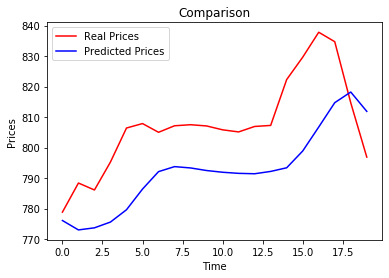

In [55]:
plt.plot(test_set, color = 'red', label = 'Real Prices')
plt.plot(predicted_stock, color = 'blue', label = 'Predicted Prices')
plt.title('Comparison')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()